# SELECCION DE DATA

In [2]:
import pandas as pd #Manipulación de datos
import numpy as np #Calculos de Matrices y Vectores
import matplotlib.pyplot as pt #Creación de Gráficos
import requests as rq #Manejo y Capturacion de datos Html
import os #Manejo de Archivos Drive

In [3]:
pd.set_option("display.precision",2)

In [4]:
import sys

if 'google.colab' in sys.modules:
  from google.colab import drive
  drive.mount('/content/drive')
  dir = '/content/drive/MyDrive/ESIS_2024/7mo_semestre/Analitica_Datos/UNID02/TrabajoUnidad02/Data/bank'
else:
  dir = './Data/bank/'
  
os.listdir(dir)

['bank-full.csv',
 'bank-names.txt',
 'bank.csv',
 'bank-full-trad.xlsx',
 'bank-full.xlsx',
 'bank-full-trad-num.xlsx',
 '~$bank-full-trad.xlsx']

In [5]:
archivo = f'{dir}bank-full-trad-num.xlsx'
data_xls = pd.read_excel(archivo, sheet_name='bank-full')

# ANÁLISIS BÁSICOS

In [6]:
data_xls.head(5)

,edad,trabajo,estado_civil,educacion,incumplimiento,balance,pres_vivienda,pres_personal,contacto,dia,mes,duracion_seg,campania,pdias,anterior,presultado,y
0,58,5.0,2,3,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,10.0,1,2,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,3.0,2,2,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,7.0,2,0,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,0.0,1,0,0,1,0,0,0,5,5,198,1,-1,0,0,0


In [7]:
data_xls.shape  # Devuelve Filas y Columnas

(45211, 17)

In [8]:
data_xls.columns

Index(['edad', 'trabajo', 'estado_civil', 'educacion', 'incumplimiento',
       'balance', 'pres_vivienda', 'pres_personal', 'contacto', 'dia', 'mes',
       'duracion_seg', 'campania', 'pdias', 'anterior', 'presultado', 'y'],
      dtype='object')

In [9]:
data_xls.info() # Devuelve Información de las Columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   edad            45211 non-null  int64  
 1   trabajo         45211 non-null  float64
 2   estado_civil    45211 non-null  int64  
 3   educacion       45211 non-null  int64  
 4   incumplimiento  45211 non-null  int64  
 5   balance         45211 non-null  int64  
 6   pres_vivienda   45211 non-null  int64  
 7   pres_personal   45211 non-null  int64  
 8   contacto        45211 non-null  int64  
 9   dia             45211 non-null  int64  
 10  mes             45211 non-null  int64  
 11  duracion_seg    45211 non-null  int64  
 12  campania        45211 non-null  int64  
 13  pdias           45211 non-null  int64  
 14  anterior        45211 non-null  int64  
 15  presultado      45211 non-null  int64  
 16  y               45211 non-null  int64  
dtypes: float64(1), int64(16)
memory

In [10]:
data_xls.describe() # Devuelve Estadisticas de las Columnas

,edad,trabajo,estado_civil,educacion,incumplimiento,balance,pres_vivienda,pres_personal,contacto,dia,mes,duracion_seg,campania,pdias,anterior,presultado,y
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,6.56,1.83,2.06,0.02,1362.27,0.56,0.16,1.36,15.81,6.14,258.16,2.76,40.20,0.58,0.30,0.12
std,10.62,2.98,0.61,0.78,0.13,3044.77,0.50,0.37,0.90,8.32,2.41,257.53,3.10,100.13,2.30,0.72,0.32
min,18.00,0.00,1.00,0.00,0.00,-8019.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,-1.00,0.00,0.00,0.00
25%,33.00,5.00,1.00,2.00,0.00,72.00,0.00,0.00,0.00,8.00,5.00,103.00,1.00,-1.00,0.00,0.00,0.00
50%,39.00,7.00,2.00,2.00,0.00,448.00,1.00,0.00,2.00,16.00,6.00,180.00,2.00,-1.00,0.00,0.00,0.00
75%,48.00,10.00,2.00,3.00,0.00,1428.00,1.00,0.00,2.00,21.00,8.00,319.00,3.00,-1.00,0.00,0.00,0.00
max,95.00,11.00,3.00,3.00,1.00,102127.00,1.00,1.00,2.00,31.00,12.00,4918.00,63.00,871.00,275.00,3.00,1.00


In [11]:
      data_xls.loc[ (data_xls['y']==1) & (data_xls['edad'] > 60) & (data_xls['presultado']==1)]


,edad,trabajo,estado_civil,educacion,incumplimiento,balance,pres_vivienda,pres_personal,contacto,dia,mes,duracion_seg,campania,pdias,anterior,presultado,y
40363,83,9.0,2,1,0,425,0,0,1,22,6,883,1,140,1,1,1
40886,61,5.0,1,3,0,2,0,0,2,12,8,131,1,114,3,1,1
40987,76,9.0,2,1,0,3324,0,0,2,13,8,227,2,192,1,1,1
41506,79,9.0,2,2,0,723,0,0,1,9,9,276,1,79,3,1,1
41841,75,9.0,2,2,0,3771,0,0,1,16,10,186,1,183,1,1,1
41858,73,9.0,2,0,0,519,0,0,1,16,10,434,1,57,1,1,1
41959,73,9.0,2,1,0,796,0,0,2,23,10,427,1,182,2,1,1
41979,73,9.0,2,1,0,542,0,0,2,26,10,355,1,180,5,1,1
42053,66,9.0,2,3,0,1948,0,0,2,29,10,106,2,269,2,1,1
42265,63,5.0,2,3,0,5112,0,0,1,13,11,2184,2,95,3,1,1


In [12]:
                  # Filtro de Columnas y Filas que muestran la Edad, Trabajo, Duracion de la Llamada, Resultado de la Campaña y si se suscribio o no
data_xls.loc[ 
  (data_xls['y']==1) & (data_xls['edad'] > 60) & (data_xls['presultado']==1),
  ['edad','trabajo','duracion_seg','presultado','y']
  ]

,edad,trabajo,duracion_seg,presultado,y
40363,83,9.0,883,1,1
40886,61,5.0,131,1,1
40987,76,9.0,227,1,1
41506,79,9.0,276,1,1
41841,75,9.0,186,1,1
41858,73,9.0,434,1,1
41959,73,9.0,427,1,1
41979,73,9.0,355,1,1
42053,66,9.0,106,1,1
42265,63,5.0,2184,1,1


### ANALISIS POR AGRUPAMIENTO

In [13]:
# Agrupación de Datos por Trabajo y Edad, Calculando la Media de la Duracion de la Llamada por tipo de Trabajo

data_xls.groupby('trabajo')[['edad','duracion_seg']].mean().sort_values(by='edad',ascending=False)

,edad,duracion_seg
trabajo,,
9.0,61.63,287.36
0.0,47.59,237.61
4.0,46.42,245.82
3.0,42.19,256.31
1.0,40.96,288.54
8.0,40.48,268.16
5.0,40.45,254.00
7.0,40.04,262.90
10.0,39.31,252.90


In [14]:
# Agrupacion por Trabajo y Edad, Calculando la Cantidad de Registros por Trabajo y Edad y Ordenando por Trabajo y Edad

data_xls.groupby(['trabajo', 'educacion'])[['edad']].count().sort_values(by=['trabajo', 'edad'], ascending=[True, False])

edad
trabajo educacion      
0.0     0           127
        2            71
        1            51
        3            39
1.0     2           728
        3           289
        1           257
        0            29
2.0     2          4219
        3           572
        1           209
        0           171
3.0     3           686
        2           542
        1           183
        0            76
4.0     1           627
        2           395
        3           173
        0            45
5.0     3          7801
        2          1121
        1           294
        0           242
6.0     2           508
        3           223
        0           163
        1            44
7.0     2          5371
        1          3758
        0           454
        3           149
8.0     3           833
        2           577
        1           130
        0            39
9.0     2           984
        1           795
        3           366
        0           119
10.0    2          5229
        3          1968
        0           242
        1           158
11.0    2          3457
        1           345
        3           202
        0           150

In [15]:
pd.crosstab(data_xls['trabajo'], data_xls['educacion'])

educacion,0,1,2,3
trabajo,,,,
0.0,127,51,71,39
1.0,29,257,728,289
2.0,171,209,4219,572
3.0,76,183,542,686
4.0,45,627,395,173
5.0,242,294,1121,7801
6.0,163,44,508,223
7.0,454,3758,5371,149
8.0,39,130,577,833


In [16]:
# Tabla cruzada de la Educacion y el Contacto
pd.crosstab(data_xls['educacion'], data_xls['contacto'], margins=True)

contacto,0,1,2,All
educacion,,,,
0,677,190,990,1857
1,2561,722,3568,6851
2,7149,1365,14688,23202
3,2633,629,10039,13301
All,13020,2906,29285,45211


In [17]:
pd.crosstab(data_xls['estado_civil'], data_xls['pres_vivienda'])

pres_vivienda,0,1
estado_civil,,
1,5888,6902
2,11893,15321
3,2300,2907


In [18]:
pd.crosstab(data_xls['estado_civil'], data_xls['pres_vivienda'], normalize='index')

pres_vivienda,0,1
estado_civil,,
1,0.46,0.54
2,0.44,0.56
3,0.44,0.56


In [19]:
pd.crosstab(data_xls['estado_civil'], data_xls['incumplimiento'], normalize='index')

incumplimiento,0,1
estado_civil,,
1,0.98,0.02
2,0.98,0.02
3,0.98,0.02


In [20]:
pd.crosstab(data_xls['estado_civil'], data_xls['incumplimiento'])

incumplimiento,0,1
estado_civil,,
1,12551,239
2,26766,448
3,5079,128


## GRAFICOS

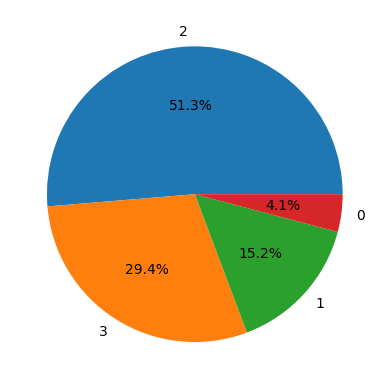

In [21]:
fig, ax = pt.subplots()
ax.pie(data_xls['educacion'].value_counts(), labels=data_xls['educacion'].value_counts().index, autopct='%1.1f%%')
pt.show()

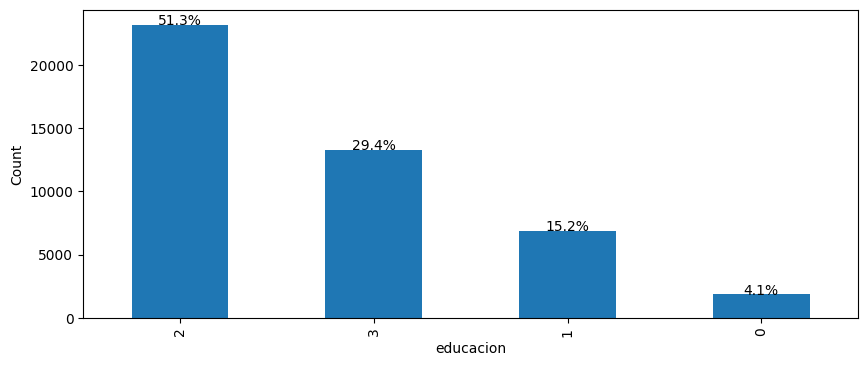

In [22]:
ax = data_xls['educacion'].value_counts().plot.bar(figsize=(10,4))
ax.set_ylabel('Count')

# Add percentages to the bar plot
total = len(data_xls['educacion'])
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height() / total)
  x = p.get_x() + p.get_width() / 2
  y = p.get_height()
  ax.annotate(percentage, (x, y), ha='center')

pt.show()

<Axes: xlabel='duracion_seg', ylabel='edad'>

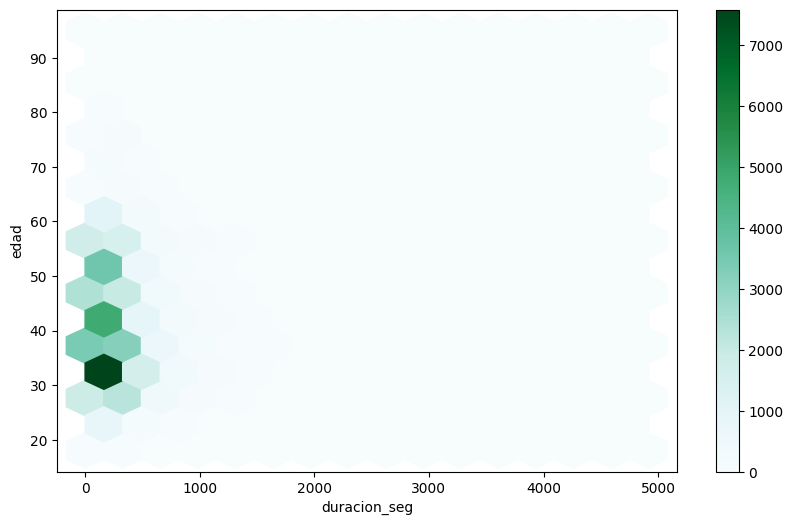

In [23]:
data_xls.plot.hexbin(x='duracion_seg', y='edad', gridsize=15, figsize=(10,6))

In [25]:
# Calcula la matriz de correlación
corr = data_xls.corr()
corr

,edad,trabajo,estado_civil,educacion,incumplimiento,balance,pres_vivienda,pres_personal,contacto,dia,mes,duracion_seg,campania,pdias,anterior,presultado,y
edad,1.00e+00,3.03e-02,4.03e-01,-1.74e-01,-1.79e-02,9.78e-02,-1.86e-01,-1.57e-02,-0.03,-9.12e-03,9.29e-02,-4.65e-03,4.76e-03,-2.38e-02,1.29e-03,-3.29e-03,0.03
trabajo,3.03e-02,1.00e+00,7.70e-03,-8.65e-02,-2.84e-03,-2.49e-02,3.71e-02,2.51e-02,-0.02,1.38e-02,1.68e-03,8.34e-03,1.25e-02,-3.20e-03,-9.02e-03,-7.61e-03,-0.02
estado_civil,4.03e-01,7.70e-03,1.00e+00,-9.54e-02,7.02e-03,-2.12e-03,1.61e-02,4.69e-02,-0.04,5.26e-03,5.09e-02,-1.19e-02,8.99e-03,-1.92e-02,-1.50e-02,-2.92e-02,-0.05
educacion,-1.74e-01,-8.65e-02,-9.54e-02,1.00e+00,-9.04e-03,5.06e-02,-3.87e-02,4.31e-03,0.15,2.17e-02,6.79e-02,2.55e-03,1.94e-04,7.09e-03,2.53e-02,3.33e-02,0.05
incumplimiento,-1.79e-02,-2.84e-03,7.02e-03,-9.04e-03,1.00e+00,-6.67e-02,-6.03e-03,7.72e-02,-0.02,9.42e-03,1.50e-02,-1.00e-02,1.68e-02,-3.00e-02,-1.83e-02,-3.49e-02,-0.02
balance,9.78e-02,-2.49e-02,-2.12e-03,5.06e-02,-6.67e-02,1.00e+00,-6.88e-02,-8.44e-02,0.03,4.50e-03,9.46e-02,2.16e-02,-1.46e-02,3.44e-03,1.67e-02,2.96e-02,0.05
pres_vivienda,-1.86e-01,3.71e-02,1.61e-02,-3.87e-02,-6.03e-03,-6.88e-02,1.00e+00,4.13e-02,-0.19,-2.80e-02,-1.74e-01,5.08e-03,-2.36e-02,1.24e-01,3.71e-02,3.31e-02,-0.14
pres_personal,-1.57e-02,2.51e-02,4.69e-02,4.31e-03,7.72e-02,-8.44e-02,4.13e-02,1.00e+00,0.01,1.14e-02,2.16e-02,-1.24e-02,9.98e-03,-2.28e-02,-1.10e-02,-3.52e-02,-0.07
contacto,-2.62e-02,-1.98e-02,-3.92e-02,1.51e-01,-1.54e-02,2.73e-02,-1.88e-01,1.09e-02,1.00,2.79e-02,1.74e-01,2.08e-02,-1.96e-02,2.45e-01,1.48e-01,2.47e-01,0.15
dia,-9.12e-03,1.38e-02,5.26e-03,2.17e-02,9.42e-03,4.50e-03,-2.80e-02,1.14e-02,0.03,1.00e+00,1.02e-01,-3.02e-02,1.62e-01,-9.30e-02,-5.17e-02,-7.18e-02,-0.03


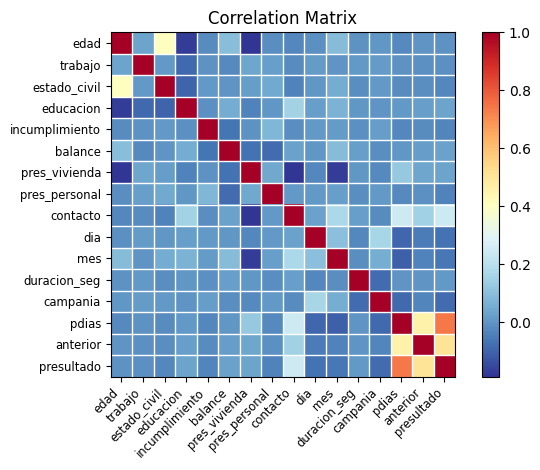

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#En este caso vemos baja correlación entre las variables. Dependiendo del
#algoritmo que utilicemos podría ser una buena decisión eliminar features que tuvieran alta correlación
corr = data_xls.set_index('y').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [28]:
data_xls['pres_vivienda']

0        1
1        1
2        1
3        1
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: pres_vivienda, Length: 45211, dtype: int64

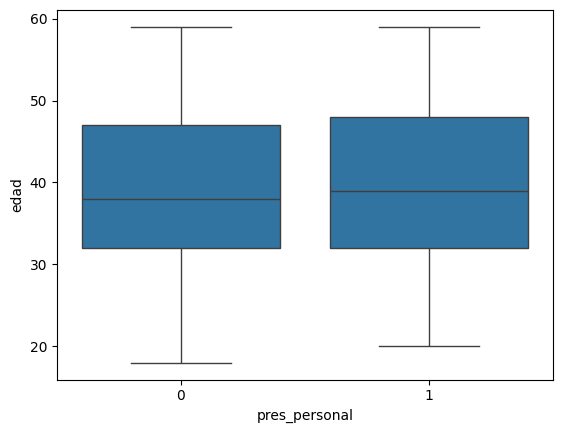

In [31]:
import seaborn as sns
sns.boxplot(x='pres_personal', y='edad', data=data_xls.query("edad<60"));

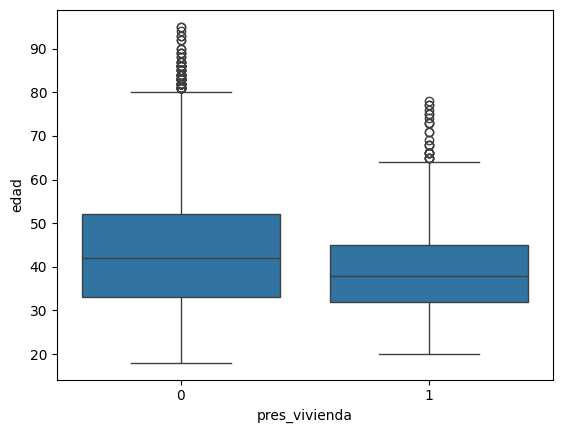

In [29]:
import seaborn as sns
sns.boxplot(x='pres_vivienda', y='edad', data=data_xls);